In [3]:
import os
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('./drive/MyDrive/cacMoHinhPhanTichDuLieu')

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('./data/Aquifer_Petrignano.csv') # Good 8
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


- Many many missing data

In [45]:
# Check date missing
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')
delta = df.Date - df.Date.shift(1)
delta.sum(), delta.count()

(Timedelta('5222 days 00:00:00'), 5222)

- Duration 1 days in all data

In [41]:
def plot_null_value(df, columns, date='Date'):
    fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))
    if len(columns) == 1:
        axs = [axs]
    for ax, col in zip(axs, columns):
        null_value = df[col].fillna(0)
        replace = df[col].fillna(np.inf)

        sns.lineplot(x=df[date], y=null_value, ax=ax, color='darkorange', label='miss value')
        sns.lineplot(x=df[date], y=replace, ax=ax, color='dodgerblue', label='fill value')

        ax.set_xlim([df[date].min(), df[date].max()])

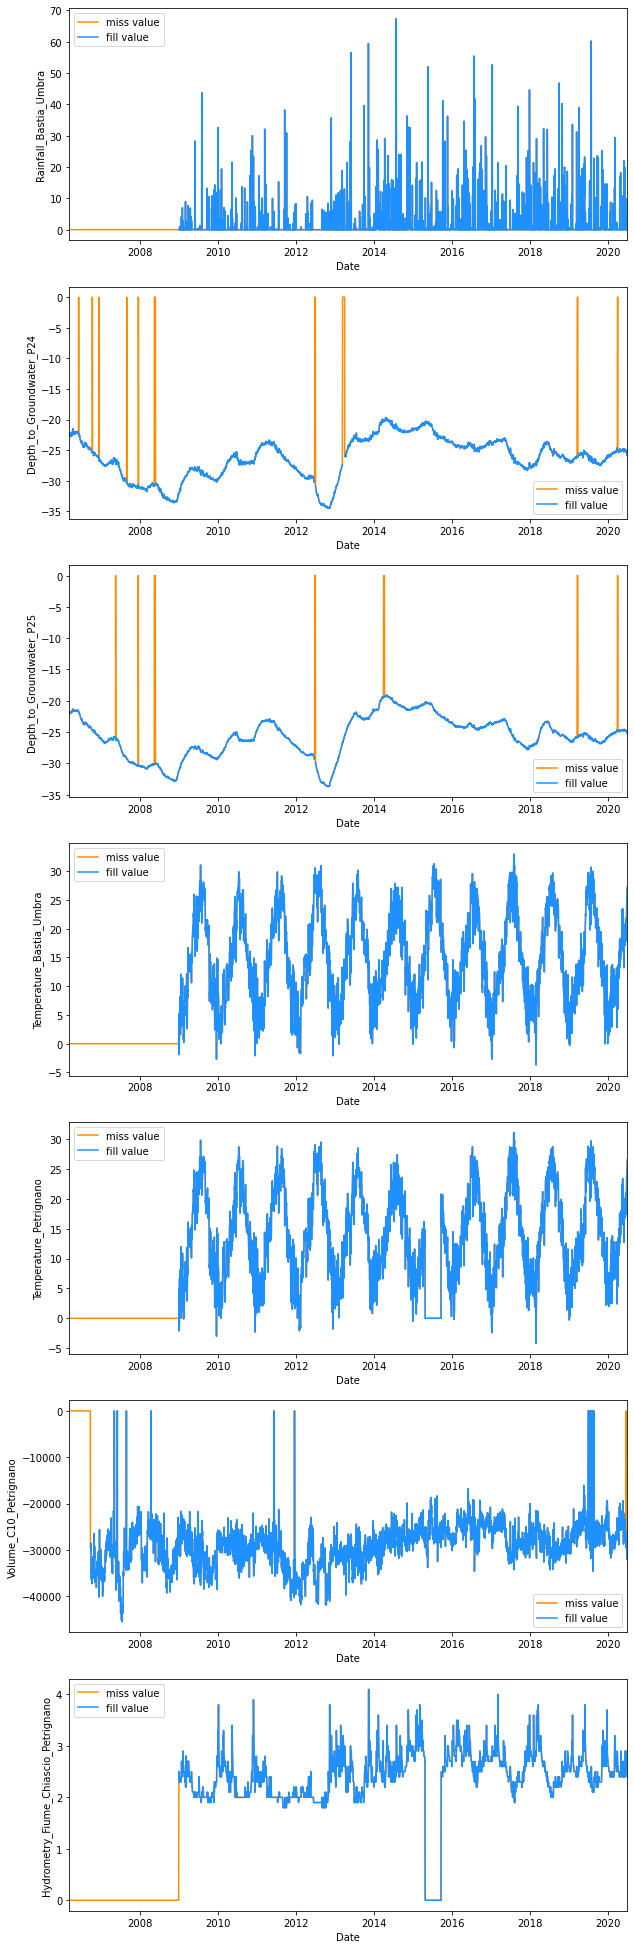

In [46]:
plot_null_value(df, df.columns[1:])

- Rainfall, Temperature(Bastia), Hydrometry have missing value before 2009 --> remove these data

In [49]:
print("Latest date when missing data appear")
for col in df.columns[1:]:
    print("{}: {}".format(col, df.Date[df[col].isnull()].max()))

Latest date when missing data appear
Rainfall_Bastia_Umbra: 2008-12-31 00:00:00
Depth_to_Groundwater_P24: 2020-04-01 00:00:00
Depth_to_Groundwater_P25: 2020-04-01 00:00:00
Temperature_Bastia_Umbra: 2008-12-31 00:00:00
Temperature_Petrignano: 2008-12-31 00:00:00
Volume_C10_Petrignano: 2020-06-15 00:00:00
Hydrometry_Fiume_Chiascio_Petrignano: 2008-12-31 00:00:00


In [53]:
df = df[df.Date > '31-12-2008']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199 entries, 1024 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              4160 non-null   float64       
 3   Depth_to_Groundwater_P25              4172 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 4198 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 295.2 KB


- "Volume_C10_Petrignano" has only 1 point missing value --> fill with interpolate

In [54]:
df.Volume_C10_Petrignano.interpolate(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199 entries, 1024 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              4160 non-null   float64       
 3   Depth_to_Groundwater_P25              4172 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 4199 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 295.2 KB


- Value of Depth_to_Groundwater_P24 & Depth_to_Groundwater_P25 are very similar
- The mean of difference is small

Mean / std difference:  0.5491568296795947 0.2470917340525159


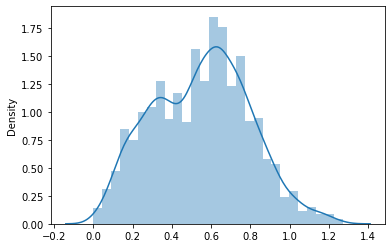

In [55]:
drop_df = df.dropna()
delta = np.abs(drop_df.Depth_to_Groundwater_P24 - drop_df.Depth_to_Groundwater_P25)
print('Mean / std difference: ', delta.mean(), delta.std())
sns.distplot(delta)
plt.show()

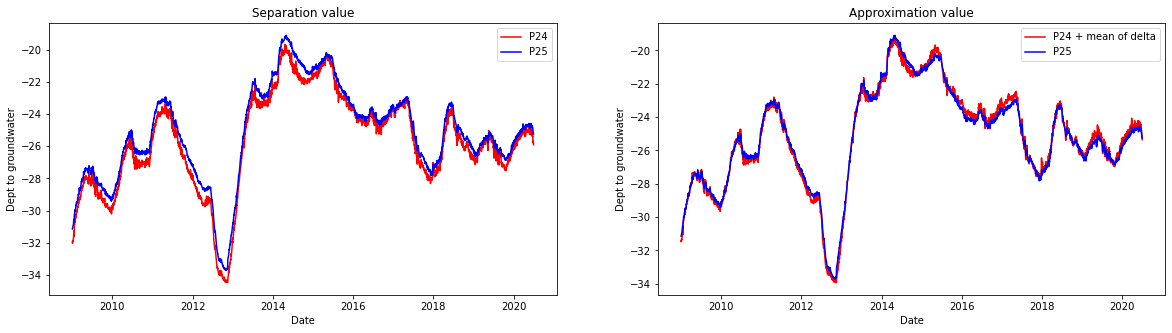

Range value: from -19.1 to -33.71
Mean absolute error:  0.2042956877048254


In [56]:
fg, axs = plt.subplots(nrows=1, ncols= 2, figsize=(10*2, 5))

axs[0].set_title('Separation value')
axs[0].set_ylabel('Dept to groundwater')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P24, color='red', label='P24', ax = axs[0])
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25, color='blue', label='P25', ax = axs[0])


axs[1].set_title('Approximation value')
axs[1].set_ylabel('Dept to groundwater')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P24 + delta.mean(), color='red', label='P24 + mean of delta', ax = axs[1])
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25, color='blue', label='P25', ax = axs[1])
plt.show()

print("Range value: from {0} to {1}".format(df.Depth_to_Groundwater_P25.max(), df.Depth_to_Groundwater_P25.min()))
print("Mean absolute error: ", np.abs((df.Depth_to_Groundwater_P24 + delta.mean()) - df.Depth_to_Groundwater_P25).mean())

- If we use the value of P24 + mean of delta (the difference) to approximate P25, the mean error just is 0.2 (too small for the range value of [-19.1; -33.71]). So we can:
> - Replace missing data of P24 & P25 by value of each other (combine with delta)
> - Use the value of P24 or P25 to forecasting (the orther can reconstruction with delta)

In [57]:
# Save to used later
np.save('./checkpoint/delta.npy', delta)

def load_delta_func(path):
    delta = np.load('./checkpoint/deta.py')
    def convert_p24_to_p25(p24_value):
        return p24_value + delta.mean()
    return convert_p24_to_p25

In [58]:
# replace missing value of P24 with value of P25
p24_fill = df.Depth_to_Groundwater_P24.copy()
p24_null_index = df.Depth_to_Groundwater_P24[df.Depth_to_Groundwater_P24.isnull()].index
p24_fill[p24_null_index] = df.Depth_to_Groundwater_P25[p24_null_index] - delta.mean()

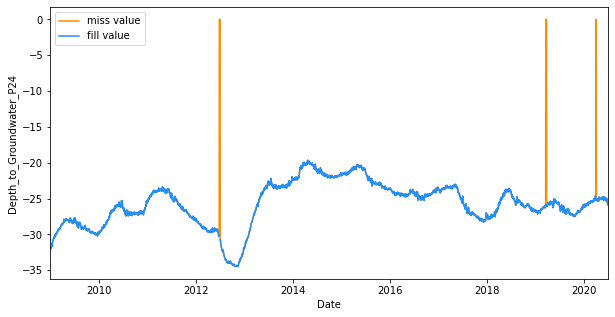

In [59]:
df.Depth_to_Groundwater_P24 = p24_fill

plot_null_value(df, ['Depth_to_Groundwater_P24'])

There are 3 ranges missing data (18 points ~ 0.4% of total)
- 2012 - 2013
- 2019 - 2020
- after 2020

In [60]:
count = df.Depth_to_Groundwater_P24.isnull().value_counts()
print(count.to_string())
print('======')
print((count/count.sum()).to_string())

False    4181
True       18
False    0.995713
True     0.004287


We use 3 methods to fill missing data:

- Fill with last value
- Fill with mean value
- Fill with interpolate (linear)

To evaluate the effect of each methods, we choose 'good' range data, then random about 20% data as missing and compute the absuluate error when use these method to filling

In [63]:
def get_fill_value(origin_col):
    last_value = origin_col.ffill()
    mean_value = origin_col.fillna(origin_col.mean())
    interpolate = origin_col.interpolate()
    return last_value, mean_value, interpolate

def fill_score(original_data, r):
    data = original_data.copy()
    miss_data = data.sample(int(r * len(data)))
    data[miss_data.index] = np.nan
    
    last_value, mean_value, interpolate = get_fill_value(data)
    last_err = np.abs(last_value - original_data).mean()
    mean_err = np.abs(mean_value - original_data).mean()
    interpolate_err = np.abs(interpolate - original_data).mean()
    
    return last_err, mean_err, interpolate_err

def fill_value_visual(date, origin_col):
    last_value, mean_value, interpolate = get_fill_value(origin_col)
    
    fg, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[0][0])
    sns.lineplot(x=date, y=origin_col.fillna(np.inf), color='dodgerblue', label='original value', ax = axs[0][0])
    axs[0][0].tick_params(axis='x', rotation=45)

    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[0][1])
    sns.lineplot(x=date, y=last_value, color='dodgerblue', label='fill last', ax = axs[0][1])
    axs[0][1].tick_params(axis='x', rotation=45)
    
    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[1][0])
    sns.lineplot(x=date, y=mean_value, color='dodgerblue', label='fill mean', ax = axs[1][0])
    axs[1][0].tick_params(axis='x', rotation=45)
    
    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[1][1])
    sns.lineplot(x=date, y=interpolate, color='dodgerblue', label='fill interpolate', ax = axs[1][1])
    axs[1][1].tick_params(axis='x', rotation=45)
    
    plt.show()


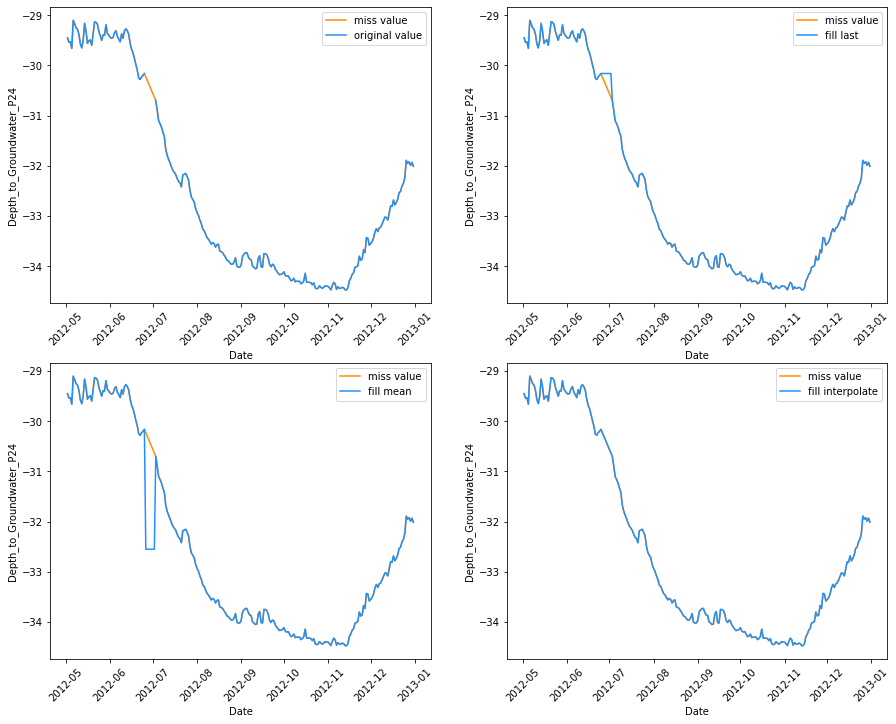

In [64]:
index = (df.Date > '05-2012') & (df.Date < '2013')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

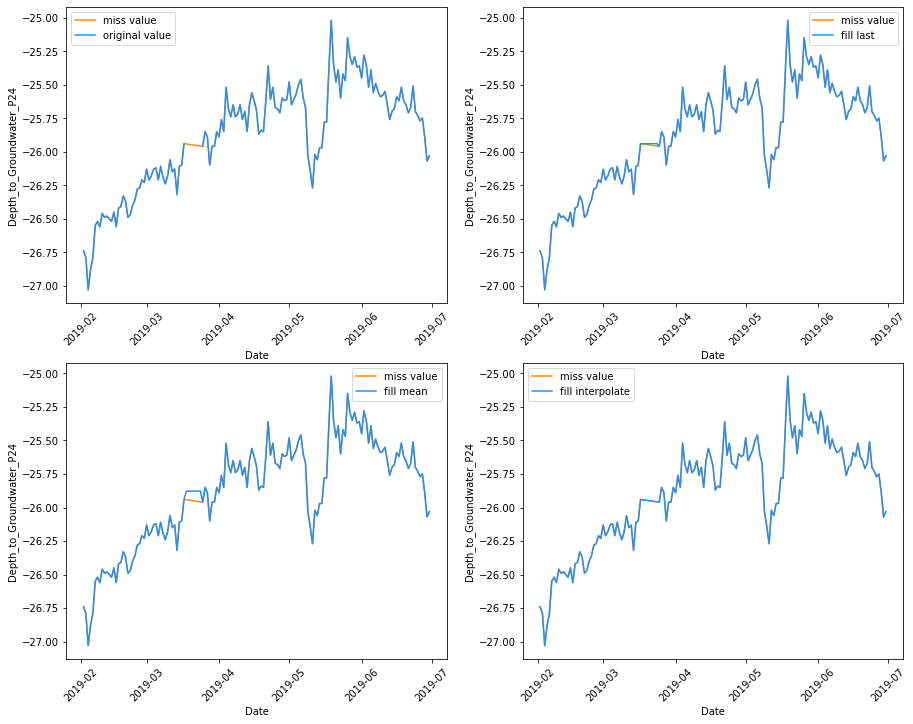

In [62]:
index = (df.Date > '02-2019') & (df.Date < '07-2019')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

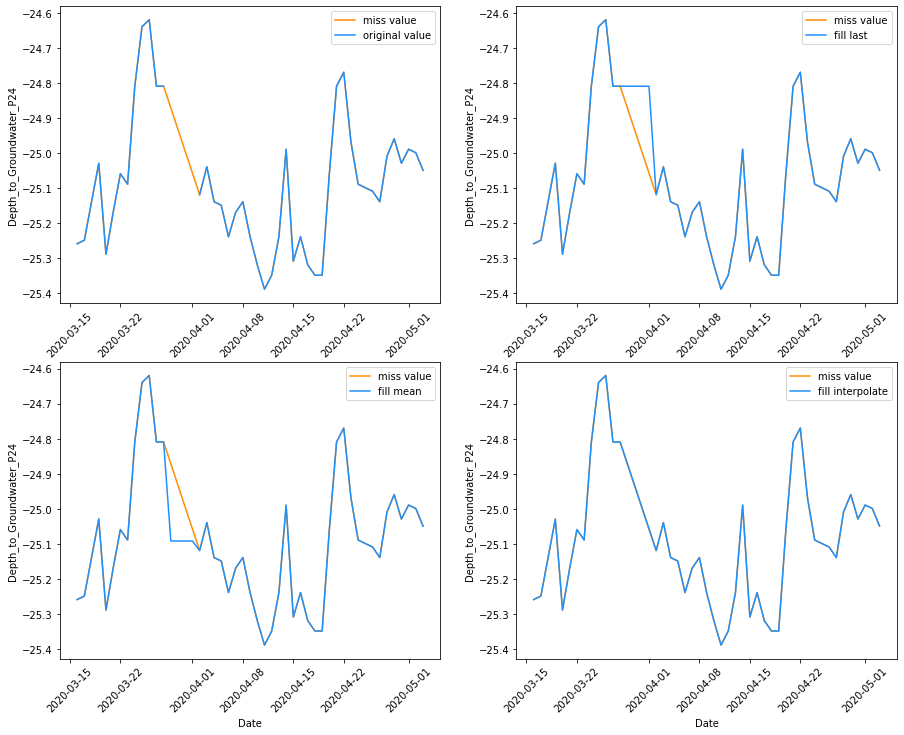

In [19]:
index = (df.Date > '15-03-2020') & (df.Date < '05-04-2020')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

In [65]:
# computer error when using different filling method
index = (df.Date > '2014') & (df.Date < '2016')

last_err, mean_err, inter_err = fill_score(df.Depth_to_Groundwater_P24[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  0.018491083676268887
Mean value filling:  0.15734567901234553
Interpolate value filling:  0.014453589391861053


The interpolate has high performance!

In [66]:
df.Depth_to_Groundwater_P24.interpolate(inplace=True)

## Extract feature

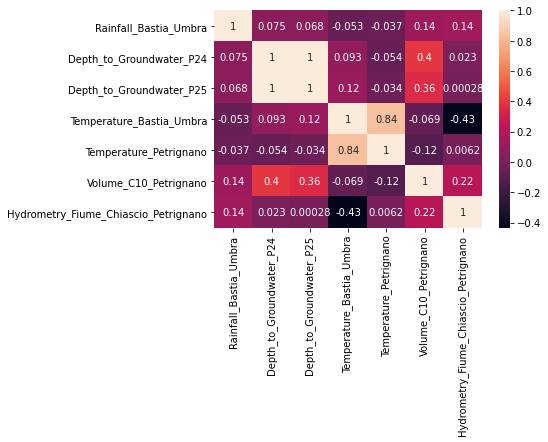

In [67]:
sns.heatmap(df.corr(), annot=True)
plt.show()

- Depth_to_Groundwater_P24 & Depth_to_Groundwater_P25 is very high correlation
- Temperature at Petrignano & Bastia Umbra is high correlation

We reduce these features, that will not affect our model later

In [68]:
df.drop(['Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra'], axis=1, inplace = True)
df.columns = ['date', 'rainfall', 'dept', 'temperature', 'volume', 'hydrometry']
df.head()

,date,rainfall,dept,temperature,volume,hydrometry
1024,2009-01-01,0.0,-31.96,4.9,-24530.688,2.4
1025,2009-01-02,0.0,-32.03,2.5,-28785.888,2.5
1026,2009-01-03,0.0,-31.97,3.9,-25766.208,2.4
1027,2009-01-04,0.0,-31.91,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.94,-2.1,-29854.656,2.3


# Outlier

## Explore outlier

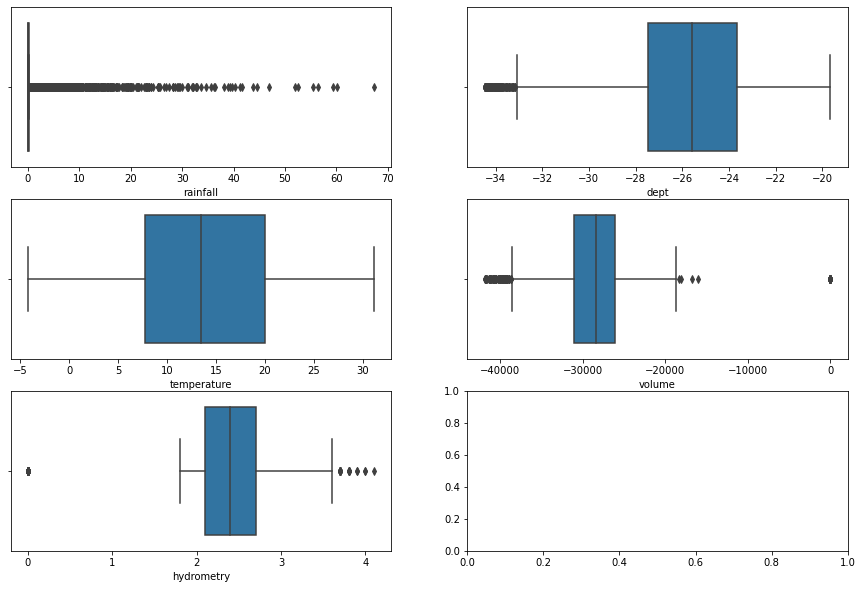

In [69]:
_, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

sns.boxplot(df.rainfall, ax = axs[0][0])
sns.boxplot(df.dept, ax = axs[0][1])
sns.boxplot(df.temperature, ax = axs[1][0])
sns.boxplot(df.volume, ax = axs[1][1])
sns.boxplot(df.hydrometry, ax = axs[2][0])
plt.show()

In [70]:
des = df.describe()
des

,rainfall,dept,temperature,volume,hydrometry
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,1.556633,-25.726428,13.739081,-28668.781432,2.372517
std,5.217923,3.032667,7.701369,4570.206679,0.589088
min,0.000000,-34.470000,-4.200000,-41890.176000,0.000000
25%,0.000000,-27.455000,7.700000,-31082.400000,2.100000
50%,0.000000,-25.590000,13.500000,-28388.448000,2.400000
75%,0.100000,-23.660000,20.000000,-26043.984000,2.700000
max,67.300000,-19.660000,31.100000,0.000000,4.100000


- The Volume and Hydrometry may be have small outlier
- We will see the distribute between them and ther target feature

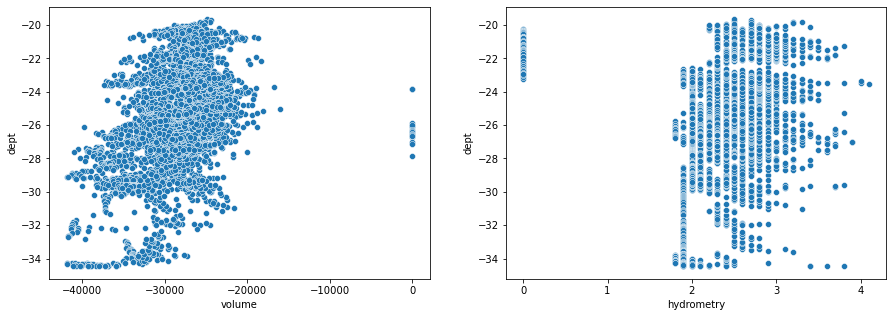

In [71]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(df.volume, df.dept, ax = axs[0])
sns.scatterplot(df.hydrometry, df.dept, ax = axs[1])
plt.show()

## Deal with outlier

We also use 3 method to deal with the outliers

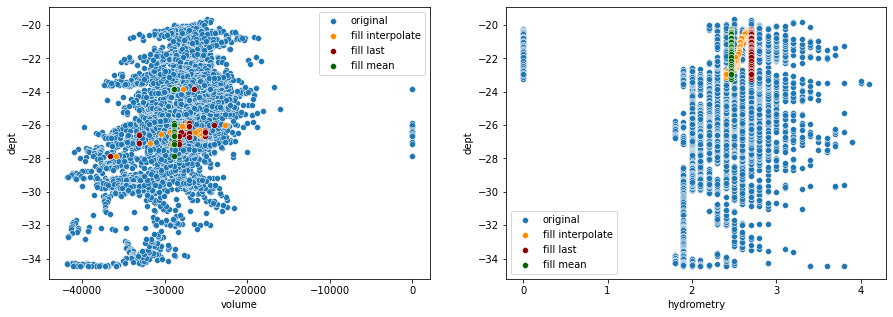

In [72]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

volume = df.volume.replace(0, np.nan)
index = volume.isnull()
sns.scatterplot(df.volume, df.dept, ax = axs[0], label='original')
sns.scatterplot(volume.interpolate()[index], df.dept[index], color='darkorange', ax = axs[0], label='fill interpolate')
sns.scatterplot(volume.ffill()[index], df.dept[index], color='darkred', ax = axs[0], label='fill last')
sns.scatterplot(volume.fillna(volume.mean())[index], df.dept[index], color='darkgreen', ax = axs[0], label='fill mean')

hydrometry = df.hydrometry.replace(0, np.nan)
index = hydrometry.isnull()
sns.scatterplot(df.hydrometry, df.dept, ax = axs[1], label='original')
sns.scatterplot(hydrometry.interpolate()[index], df.dept[index], color='darkorange', ax = axs[1], label='fill interpolate')
sns.scatterplot(hydrometry.ffill()[index], df.dept[index], color='darkred', ax = axs[1], label='fill last')
sns.scatterplot(hydrometry.fillna(hydrometry.mean())[index], df.dept[index], color='darkgreen', ax = axs[1], label='fill mean')

plt.show()

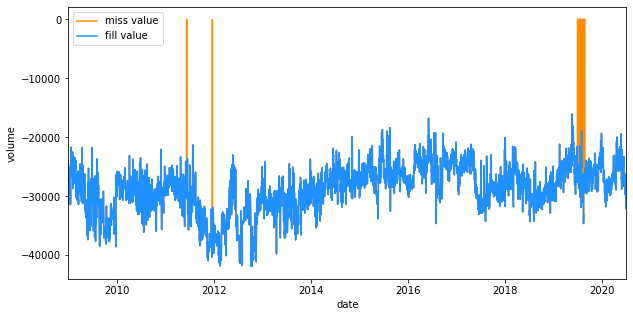

In [73]:
df.volume.replace(0, np.nan, inplace=True)
plot_null_value(df, ['volume'], 'date')

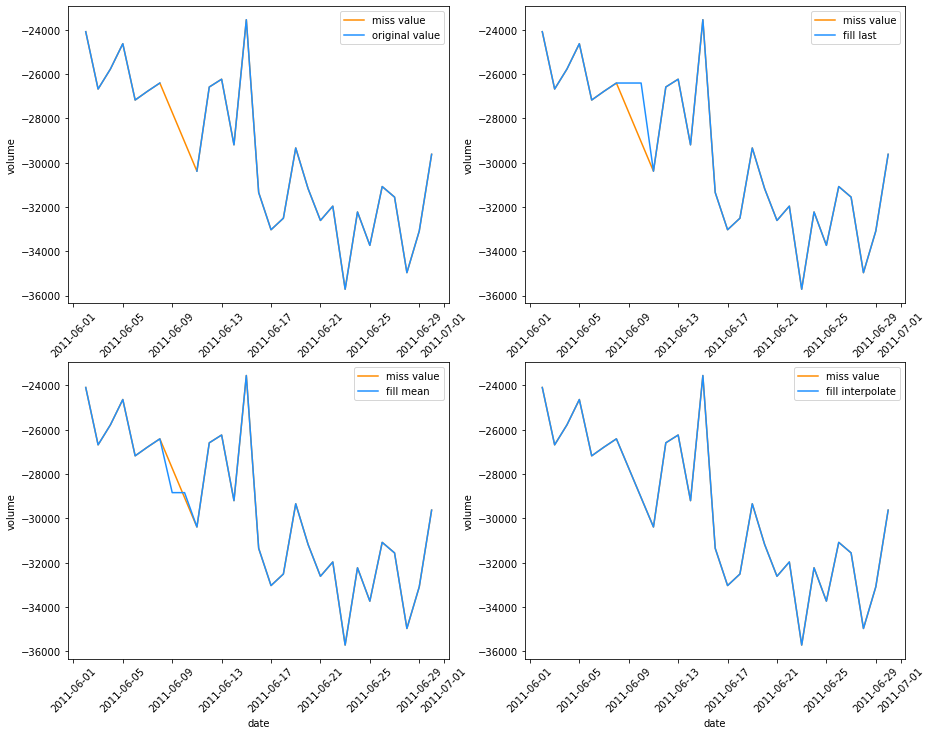

In [74]:
index = (df.date > '06-2011') & (df.date < '07-2011')
fill_value_visual(df.date[index], df.volume)

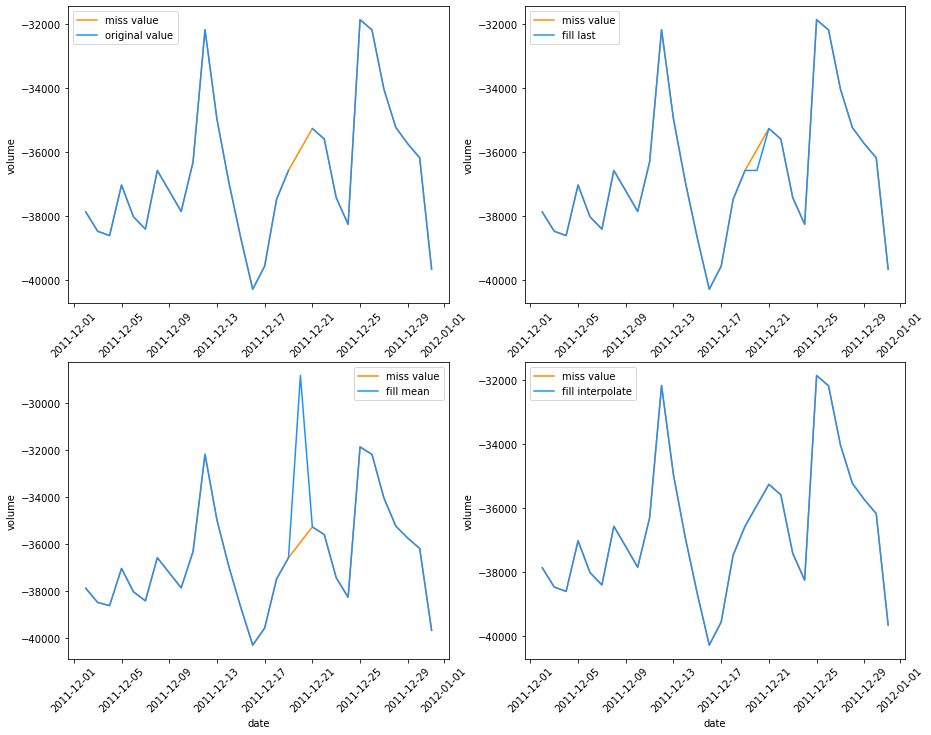

In [75]:
index = (df.date > '12-2011') & (df.date < '01-2012')
fill_value_visual(df.date[index], df.volume)

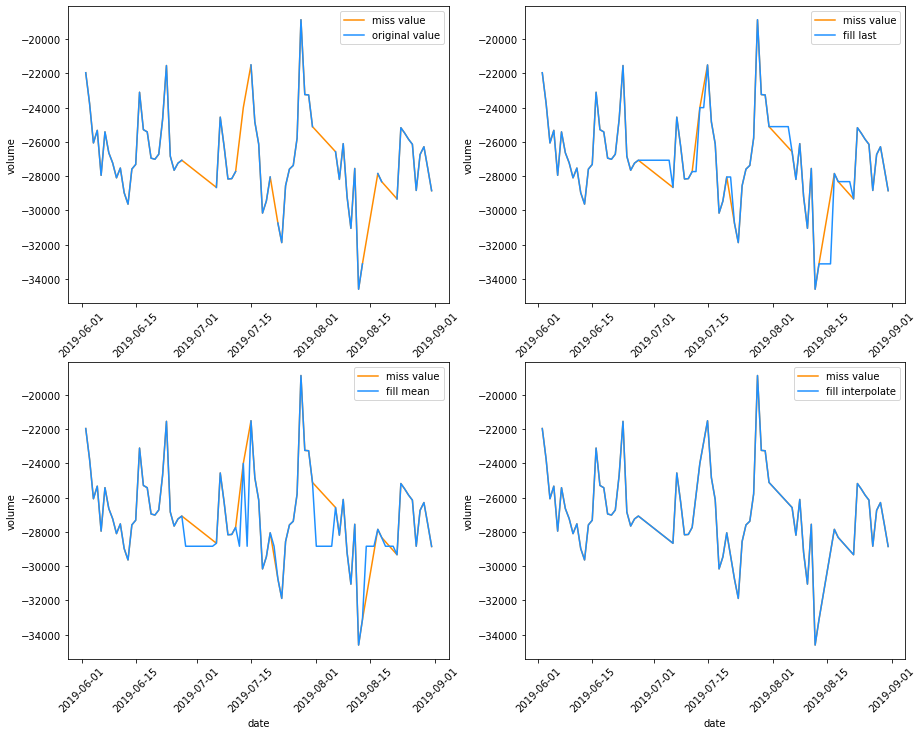

In [76]:
index = (df.date > '06-2019') & (df.date < '09-2019')
fill_value_visual(df.date[index], df.volume)

In [77]:
index = (df.date > '2014') & (df.date < '2016')
last_err, mean_err, inter_err = fill_score(df.volume[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  252.23822222222225
Mean value filling:  324.71914358193874
Interpolate value filling:  209.31832098765435


In [79]:
# The interpolate
df.volume.interpolate(inplace=True)

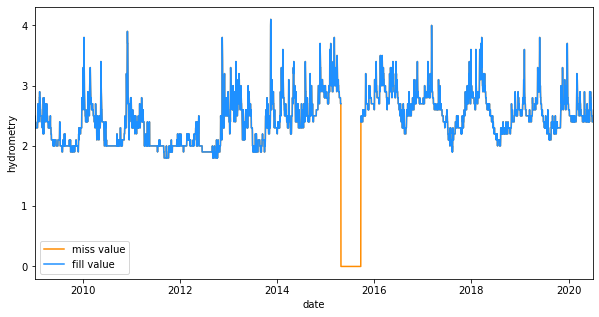

In [80]:
df.hydrometry.replace(0, np.nan, inplace=True)
plot_null_value(df, ['hydrometry'], 'date')

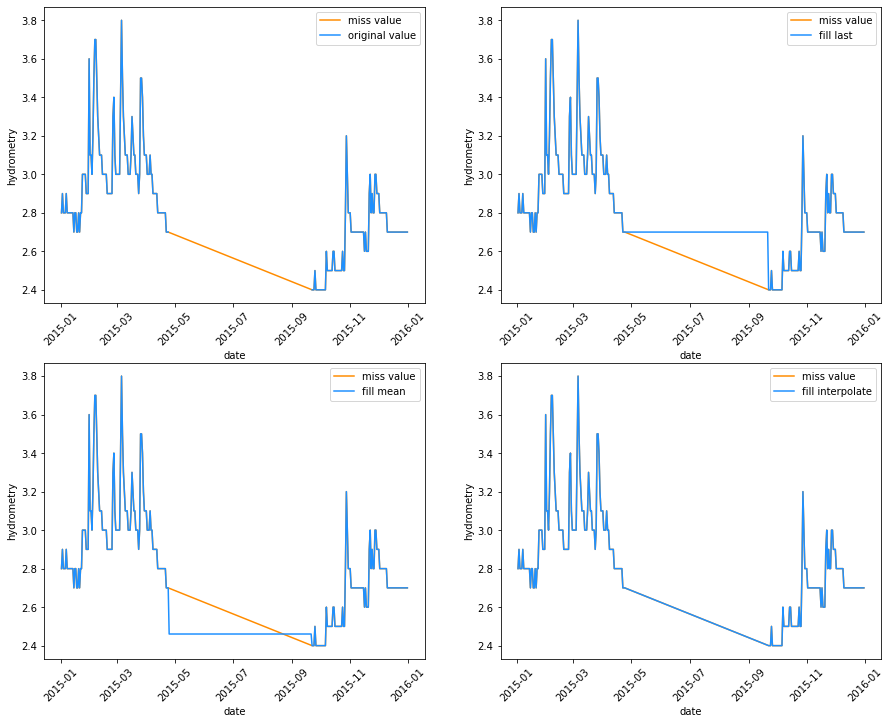

In [81]:
index = (df.date > '2015') & (df.date < '2016')
fill_value_visual(df.date[index], df.hydrometry)

In [82]:
index = (df.date > '2010') & (df.date < '2014')
last_err, mean_err, inter_err = fill_score(df.hydrometry[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  0.011780821917808208
Mean value filling:  0.0570174985926066
Interpolate value filling:  0.008961187214611874


In [83]:
df.hydrometry.interpolate(inplace=True)

# Clean data

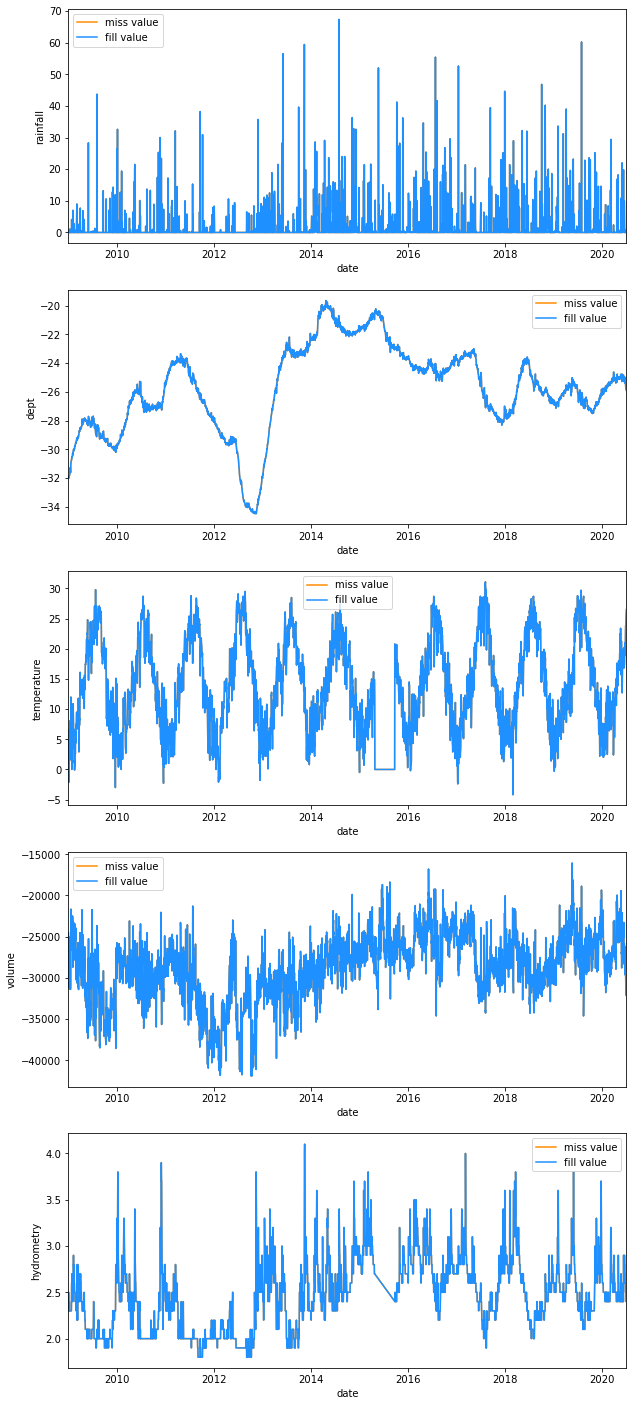

In [84]:
plot_null_value(df, df.columns[1:], 'date')

In [85]:
df.to_csv('./checkpoint/clean_data.csv', index=False)